# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #pause for 1 second using time.sleepa()- aviod the spi key frim being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tecoanapa
Processing Record 2 of Set 1 | apollonia
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | evensk
Processing Record 8 of Set 1 | atambua
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | caravelas
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | kyritz
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | luang prabang
Processing Record 23 of Set 1 | chachapoyas
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tecoanapa,16.5167,-98.7500,87.33,70,6,8.79,MX,1689116118
1,apollonia,36.9716,24.7231,74.91,75,0,10.94,GR,1689116119
2,rikitea,-23.1203,-134.9692,73.22,64,43,10.47,PF,1689115821
3,nikolskoye,59.7035,30.7861,53.49,80,16,5.19,RU,1689116121
4,laguna,38.4210,-121.4238,100.54,22,0,5.75,US,1689116122


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tecoanapa,16.5167,-98.7500,87.33,70,6,8.79,MX,1689116118
1,apollonia,36.9716,24.7231,74.91,75,0,10.94,GR,1689116119
2,rikitea,-23.1203,-134.9692,73.22,64,43,10.47,PF,1689115821
3,nikolskoye,59.7035,30.7861,53.49,80,16,5.19,RU,1689116121
4,laguna,38.4210,-121.4238,100.54,22,0,5.75,US,1689116122


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

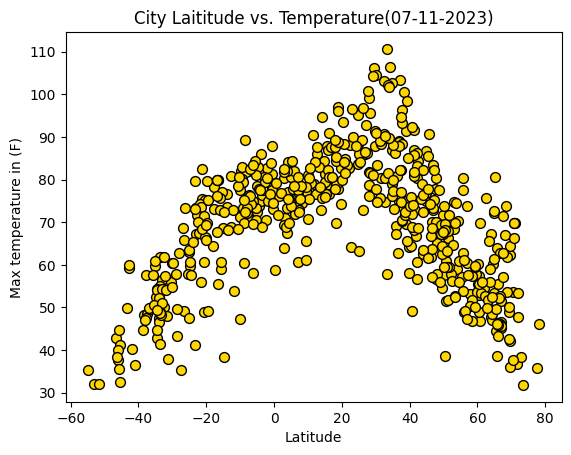

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color = "gold",
    edgecolor="black",
    linewidths = 1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title('City Laititude vs. Temperature(%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max temperature in (F)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

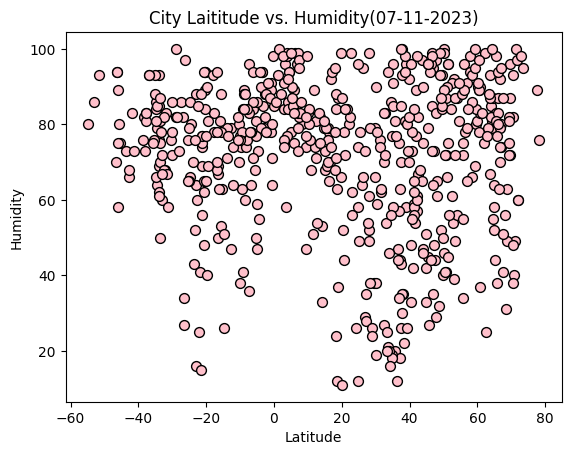

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color = "pink",
    edgecolor="black",
    linewidths = 1,
    marker="o",
    label="Cities",
    s=50
)



# Incorporate the other graph properties
plt.title('City Laititude vs. Humidity(%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

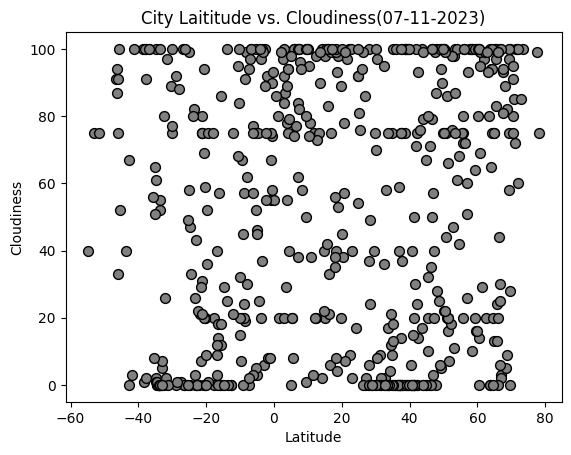

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color = "grey",
    edgecolor="black",
    linewidths = 1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title('City Laititude vs. Cloudiness(%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")



# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

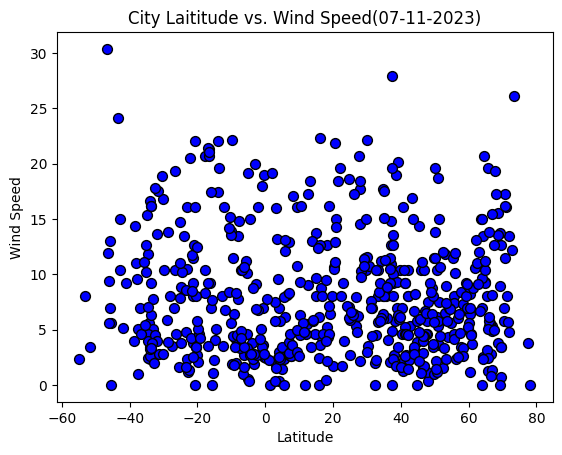

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color = "blue",
    edgecolor="black",
    linewidths = 1,
    marker="o",
    label="Cities",
    s=50
)
# Incorporate the other graph properties
plt.title('City Laititude vs. Wind Speed(%s)' % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_reggression(x_values, y_values, title, text_coordinates, color):
    
    #compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values, color = color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"the r-value is: {rvalue**2}")
plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tecoanapa,16.5167,-98.7500,87.33,70,6,8.79,MX,1689116118
1,apollonia,36.9716,24.7231,74.91,75,0,10.94,GR,1689116119
3,nikolskoye,59.7035,30.7861,53.49,80,16,5.19,RU,1689116121
4,laguna,38.4210,-121.4238,100.54,22,0,5.75,US,1689116122
6,evensk,61.9500,159.2333,54.63,75,97,10.56,RU,1689116125


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,73.22,64,43,10.47,PF,1689115821
5,hithadhoo,-0.6000,73.0833,81.30,71,74,3.60,MV,1689116123
7,atambua,-9.1061,124.8925,73.27,84,45,6.42,ID,1689116126
8,bluff,-46.6000,168.3333,42.78,70,91,30.38,NZ,1689116127
10,punta arenas,-53.1500,-70.9167,32.11,86,75,8.05,CL,1689116015


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.3894646693234765


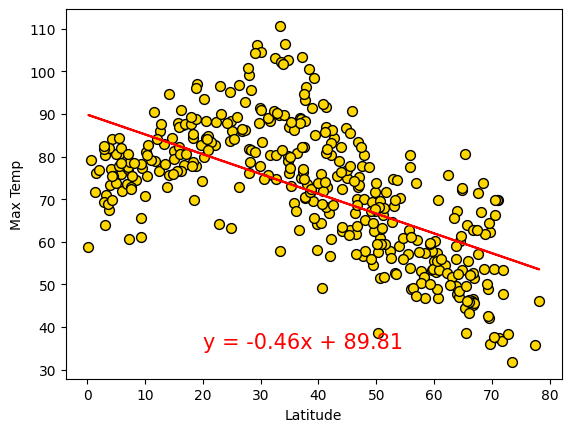

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_reggression(x_values, y_values, "Max Temp", (20,35), "gold")

the r-value is: 0.673368699541057


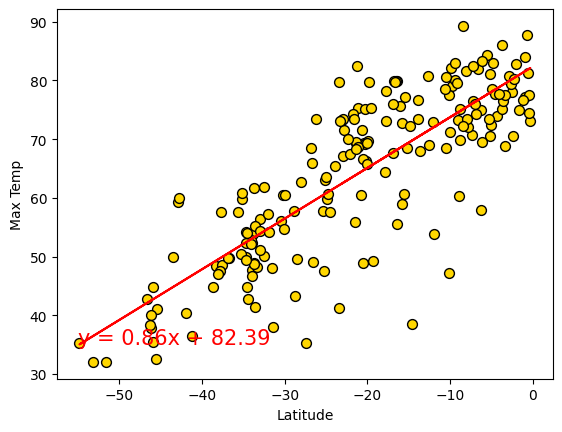

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_reggression(x_values, y_values, "Max Temp", (-55,35), "gold")

**Discussion about the linear relationship:** in the northern hemp the r value is 3.8 this a weak positive corrilation between the latitude and the max temp and in the soutern hemp the r value is .67 which indiactes a moderate possitive coorilation between the max temp and the  latitude

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.0005638186639907211


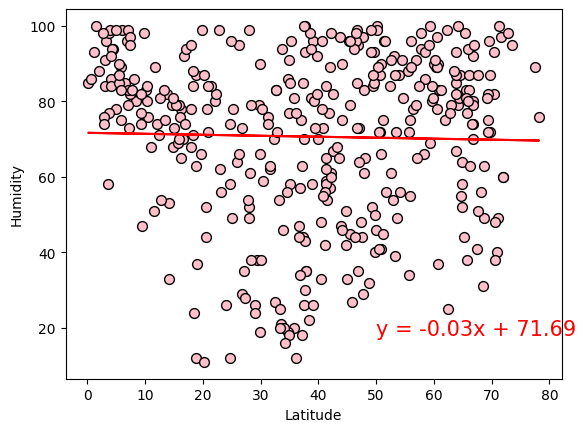

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_reggression(x_values, y_values, "Humidity", (50,18), "pink")

the r-value is: 0.0003456681762017813


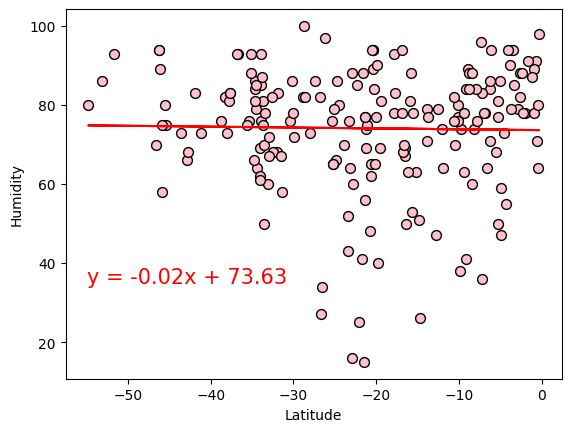

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_reggression(x_values, y_values, "Humidity", (-55,35), "pink")

**Discussion about the linear relationship:** the r values indicate the weak to no relationship between the humidity and the latitude in both the northern and southern hemp.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.0003512259851909075


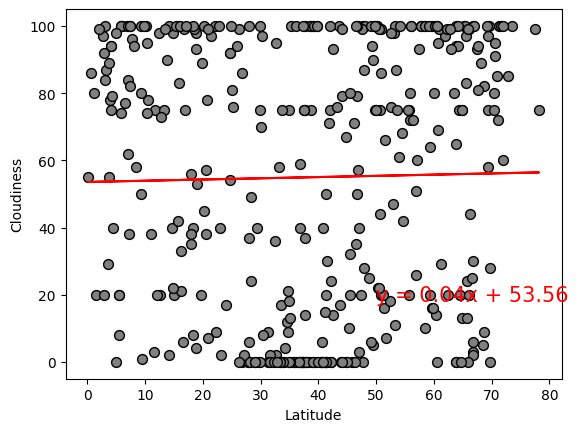

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_reggression(x_values, y_values, "Cloudiness", (50,18), "grey")

the r-value is: 0.0021379667166021928


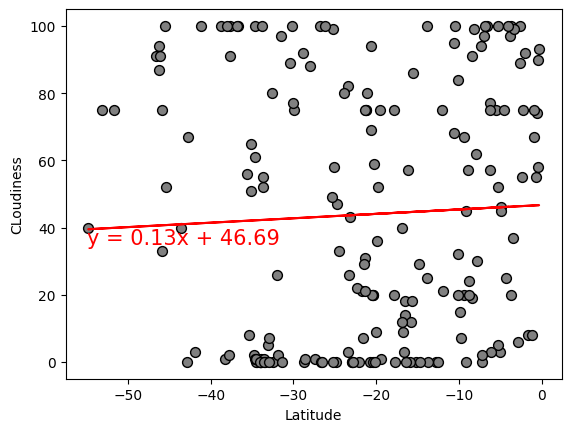

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_reggression(x_values, y_values, "CLoudiness", (-55,35), "grey")

**Discussion about the linear relationship:** the r values indicate the weak to no relationship between the cloudiness and the latitude in both the northern and southern hemp.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.0015214614928715892


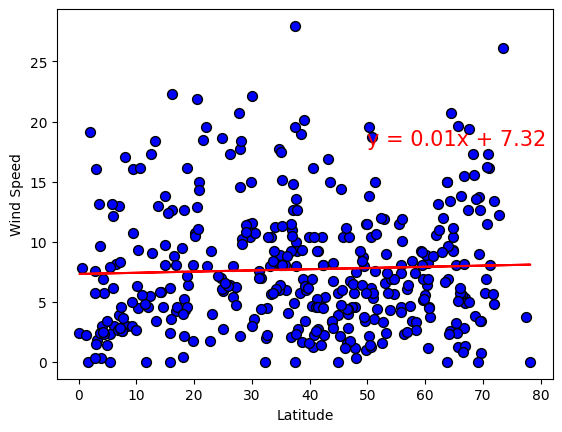

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_reggression(x_values, y_values, "Wind Speed", (50,18), "blue")

the r-value is: 0.0034265056057429725


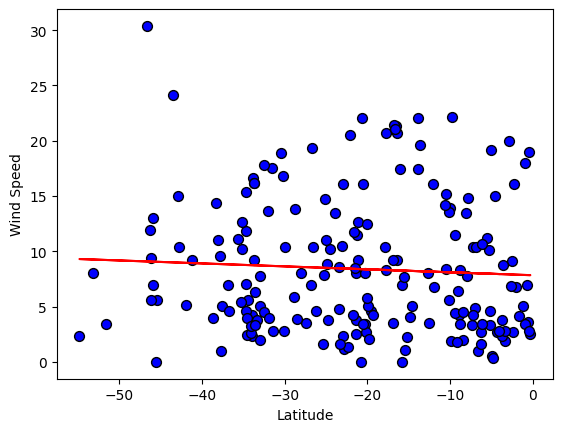

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_reggression(x_values, y_values, "Wind Speed", (-55,35), "blue")

**Discussion about the linear relationship:** the r values indicate the weak to no relationship between the windspeed and the latitude in both the northern and southern hemp.